$$ Ahmed \space Azzam $$

$$ Advanced \space House \space price $$

# `01` Importing Necessary Libraries

In [10]:
import warnings
warnings.filterwarnings('ignore')


## `i` Data Manipulation Libraries

In [11]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt


## `ii` Preprocessing Libraries

In [9]:
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

## `iii` Model Libraries

----------------

# `02` Loading Data

In [3]:
data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Check for Nulls

In [12]:
null_values=data.isnull().sum().reset_index().rename(columns={0:'null_col'})
null_values[null_values['null_col']>0].sort_values(by=['null_col'],ascending=False)

,index,null_col
3,LotFrontage,259
56,GarageType,81
57,GarageYrBlt,81
58,GarageFinish,81
61,GarageQual,81
62,GarageCond,81
31,BsmtExposure,38
34,BsmtFinType2,38
29,BsmtQual,37
30,BsmtCond,37


In [13]:
null_values=test_data.isnull().sum().reset_index().rename(columns={0:'null_col'})
null_values[null_values['null_col']>0].sort_values(by=['null_col'],ascending=False)

,index,null_col
3,LotFrontage,227
57,GarageYrBlt,78
62,GarageCond,78
61,GarageQual,78
58,GarageFinish,78
56,GarageType,76
30,BsmtCond,45
29,BsmtQual,44
31,BsmtExposure,44
32,BsmtFinType1,42


In [7]:
print(data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [8]:
data=data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'])
test_data=test_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'])

In [14]:
data['LotFrontage']= data['LotFrontage'].fillna(data['LotFrontage'].median())
data['GarageYrBlt']= data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())
data['MasVnrArea']= data['MasVnrArea'].fillna(0)
test_data['LotFrontage']= test_data['LotFrontage'].fillna(data['LotFrontage'].median())
test_data['GarageYrBlt']= test_data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())
test_data['MasVnrArea']= test_data['MasVnrArea'].fillna(0)

In [15]:
# data= data.dropna(subset=['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond',
#                                             'BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual',
#                                             'MasVnrArea','MasVnrType','Electrical'],axis=0)
categoral_mode = ['MSZoning', 'MasVnrType' ,'Electrical', 'SaleType', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional']
for col in categoral_mode:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)
    data[col].fillna(data[col].mode()[0], inplace=True)

# replace NA with NoB 
no_basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in no_basement:
    test_data[col].fillna('NoB', inplace=True)
    data[col].fillna('NoB', inplace=True)
    

# replace NA with NoG:
no_garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in no_garage:
    test_data[col].fillna('NoG', inplace=True)
    data[col].fillna('NoG', inplace=True)

In [16]:
null_values=data.isnull().sum().reset_index().rename(columns={0:'null_col'})
null_values[null_values['null_col']>0].sort_values(by=['null_col'],ascending=False)

,index,null_col


In [17]:
print(data.shape)
print(test_data.shape)

(1460, 76)
(1459, 75)


## `ii` Check for redandance column

In [18]:
def drop_redandance(df,num_col):
    first=df.columns[0]
    dropped_col=[]
    for col in num_col:
        if df.groupby(col)['Id'].count().reset_index().sort_values(by=['Id'],ascending=False).iloc[0,1]>(df.shape[0]*0.8):
                dropped_col.append(col)
    return df.drop(columns=dropped_col),dropped_col

In [19]:
data,dropped= drop_redandance(data,list(set(data.describe().columns)-set(['Id','SalePrice'])))
dropped

['BsmtFinSF2',
 'KitchenAbvGr',
 '3SsnPorch',
 'MiscVal',
 'EnclosedPorch',
 'BsmtHalfBath',
 'ScreenPorch',
 'LowQualFinSF',
 'PoolArea']

In [20]:
test_data=test_data.drop(columns=dropped)

In [21]:
print(data.shape)
print(test_data.shape)

(1460, 67)
(1459, 66)


In [22]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000


In [23]:
num_cols=list(set(data.describe().columns)-set(['Id']))
features_to_drop=[]
num_cols_without_response=list(set(num_cols)-set(['SalePrice']))
corr_mat=data[set(num_cols)-set(['SalePrice'])].corr()
for row in range(corr_mat.shape[0]):
    for col in range(row+1,corr_mat.shape[0]):
        if np.abs(corr_mat.values[row,col])>0.7:
            var_row_corr_wth_response = np.abs(np.corrcoef(data['SalePrice'], 
                                                        data[num_cols_without_response[row]])[0, 1])
            var_col_corr_wth_response = np.abs(np.corrcoef(data['SalePrice'], 
                                                        data[num_cols_without_response[col]])[0, 1])
            if var_row_corr_wth_response > var_col_corr_wth_response:
                        features_to_drop.append(num_cols_without_response[col])
            else:
                        features_to_drop.append(num_cols_without_response[row])
data=data.drop(columns=features_to_drop)

In [24]:
features_to_drop

['TotRmsAbvGrd', 'GarageArea', 'GarageYrBlt', '1stFlrSF']

In [25]:
test_data= test_data.drop(columns=features_to_drop)

In [26]:
y_train=data['SalePrice']
data=data.drop(columns=['SalePrice'])

In [27]:
print(data.shape)
print(test_data.shape)

(1460, 62)
(1459, 62)


In [28]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2,TA,TA,Y,0,61,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2,TA,TA,Y,298,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2,TA,TA,Y,0,42,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,3,TA,TA,Y,0,35,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,3,TA,TA,Y,192,84,12,2008,WD,Normal


In [29]:
def skewness(df,num_cols):
    N=df.shape[0]
    Zs= (df[num_cols]-df[num_cols].mean())/df[num_cols].std()
    skewness=(Zs**3).sum()/(N-1)
    return skewness
def log_transformation(df,num_cols):
    skewness_coff=skewness(df,num_cols)
    i=0
    for col in num_cols:
        if abs(skewness_coff[i])>1:
            df[col]=np.log(np.abs(df[col]+1))
        i+=1
    return df

In [30]:
num_cols= list(set(data.describe().columns)-set(['Id','SalePrice']))
num_cols

['BsmtUnfSF',
 'YrSold',
 'WoodDeckSF',
 'MasVnrArea',
 'OverallCond',
 'BedroomAbvGr',
 'YearRemodAdd',
 'BsmtFullBath',
 'GrLivArea',
 'YearBuilt',
 'Fireplaces',
 'OverallQual',
 'MSSubClass',
 '2ndFlrSF',
 'LotArea',
 'MoSold',
 'TotalBsmtSF',
 'HalfBath',
 'BsmtFinSF1',
 'GarageCars',
 'LotFrontage',
 'OpenPorchSF',
 'FullBath']

In [31]:
skew=skewness(data,num_cols)

In [32]:
data=log_transformation(data,num_cols)

In [33]:
def log_transformation_for_test(df,num_cols,skewness_coff):
    i=0
    for col in num_cols:
        if abs(skewness_coff[i])>1:
            df[col]=np.log(np.abs(df[col]+1))
        i+=1
    return df

In [34]:
numcols= list(set(test_data.describe().columns)-set(['Id']))
test_data=log_transformation_for_test(test_data,numcols,skew)

In [35]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,1,4.110874,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,...,2,TA,TA,Y,0.000000,4.127134,2,2008,WD,Normal
1,2,3.044522,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,...,2,TA,TA,Y,5.700444,0.000000,5,2007,WD,Normal
2,3,4.110874,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,...,2,TA,TA,Y,0.000000,3.761200,9,2008,WD,Normal
3,4,4.262680,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,...,3,TA,TA,Y,0.000000,3.583519,2,2006,WD,Abnorml
4,5,4.110874,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,...,3,TA,TA,Y,5.262690,4.442651,12,2008,WD,Normal


In [36]:
def check_normal_dist_shapiro(df,num_cols,alpha = 0.01):
    feats_std_scale = []
    feats_min_max_scale = []
    sample_data  = df.sample(replace = False, n= 500)
    for col in num_cols:
        stat, p = shapiro(sample_data[col])
        if p>alpha:
            feats_std_scale.append(col)
        else:
            feats_min_max_scale.append(col)
    return feats_min_max_scale,feats_std_scale

In [37]:
num_cols= list(set(data.describe().columns)-set(['Id','SalePrice']))
feats_min_max_scale,feats_std_scale=check_normal_dist_shapiro(data,num_cols)

In [38]:
print(feats_min_max_scale)
print(feats_std_scale)

['BsmtUnfSF', 'YrSold', 'WoodDeckSF', 'MasVnrArea', 'OverallCond', 'BedroomAbvGr', 'YearRemodAdd', 'BsmtFullBath', 'YearBuilt', 'Fireplaces', 'OverallQual', 'MSSubClass', '2ndFlrSF', 'LotArea', 'MoSold', 'TotalBsmtSF', 'HalfBath', 'BsmtFinSF1', 'GarageCars', 'LotFrontage', 'OpenPorchSF', 'FullBath']
['GrLivArea']


In [39]:
test_data.shape

(1459, 62)

In [40]:
data.shape

(1460, 62)

In [41]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,1,4.110874,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,...,2,TA,TA,Y,0.000000,4.127134,2,2008,WD,Normal
1,2,3.044522,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,...,2,TA,TA,Y,5.700444,0.000000,5,2007,WD,Normal
2,3,4.110874,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,...,2,TA,TA,Y,0.000000,3.761200,9,2008,WD,Normal
3,4,4.262680,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,...,3,TA,TA,Y,0.000000,3.583519,2,2006,WD,Abnorml
4,5,4.110874,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,...,3,TA,TA,Y,5.262690,4.442651,12,2008,WD,Normal


In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   float64
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   float64
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [44]:
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
 # fitting
if len(feats_min_max_scale)>0 and len(feats_std_scale):
   min_max_scaler_model = min_max_scaler.fit(data[feats_min_max_scale])
   std_scaler_model = std_scaler.fit(data[feats_std_scale])
# transforming min_max_scale
   min_max_scaled_train_data = pd.DataFrame(min_max_scaler_model.transform(data[feats_min_max_scale]), columns = feats_min_max_scale)
   min_max_scaled_test_data = pd.DataFrame(min_max_scaler_model.transform(test_data[feats_min_max_scale]), columns = feats_min_max_scale)

 # tranforming std_scale
   std_scaled_train_data =pd.DataFrame( std_scaler_model.transform(data[feats_std_scale]), columns = feats_std_scale)
   std_scaled_test_data =pd.DataFrame( std_scaler_model.transform(test_data[feats_std_scale]), columns = feats_std_scale)
   train_data= std_scaled_train_data.merge(min_max_scaled_train_data.reset_index(drop=True), right_index = True, left_index = True)
   test_data_v2 = std_scaled_test_data.merge(min_max_scaled_test_data.reset_index(drop=True), right_index = True, left_index = True)

In [45]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,1,4.110874,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,...,2,TA,TA,Y,0.000000,4.127134,2,2008,WD,Normal
1,2,3.044522,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,...,2,TA,TA,Y,5.700444,0.000000,5,2007,WD,Normal
2,3,4.110874,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,...,2,TA,TA,Y,0.000000,3.761200,9,2008,WD,Normal
3,4,4.262680,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,...,3,TA,TA,Y,0.000000,3.583519,2,2006,WD,Abnorml
4,5,4.110874,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,...,3,TA,TA,Y,5.262690,4.442651,12,2008,WD,Normal


In [46]:
from sklearn.preprocessing import LabelEncoder
data=data.apply(LabelEncoder().fit_transform)
test_data=test_data.apply(LabelEncoder().fit_transform)

In [47]:
one_hot = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', \
           'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', \
           'Heating', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']
data = pd.get_dummies(data, columns=one_hot)
test_data = pd.get_dummies(test_data, columns=one_hot)

In [48]:
ordinal = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', \
           'CentralAir', 'Electrical', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']

ordinal_mapping  = {'ExterQual'     : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'ExterCond'     : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'BsmtQual'      : {'NoB': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'BsmtCond'      : {'NoB': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'BsmtExposure'  : {'NoB': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                    'BsmtFinType1'  : {'NoB': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
                    'BsmtFinType2'  : {'NoB': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
                    'HeatingQC'     : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},'CentralAir'    : {'N': 0, 'Y': 1},
                    'Electrical'    : {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
                    'KitchenQual'   : {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'GarageFinish'  : {'NoG': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
                    'GarageQual'    : {'NoG': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'GarageCond'    : {'NoG': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                    'PavedDrive'    : {'N': 1, 'P': 2, 'Y': 3}
                    }
data.replace(ordinal_mapping, inplace=True)
test_data.replace(ordinal_mapping, inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 209 entries, Id to SaleCondition_5
dtypes: int32(15), int64(24), uint8(170)
memory usage: 601.8 KB


In [50]:
X_train= data.drop(['Id'],axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2,random_state=0)
X_test=test_data.drop('Id',axis=1).values

In [52]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
618,0,61,746,8,4,108,57,260,0,4,...,0,1,0,0,0,0,0,0,0,1
870,0,31,159,4,4,63,12,0,3,4,...,0,0,0,1,0,0,0,0,1,0
92,1,51,874,4,6,25,56,0,3,2,...,0,0,0,1,0,0,0,0,1,0
817,0,40,868,7,4,103,52,93,2,4,...,0,0,0,1,0,0,0,0,1,0
302,0,87,899,6,4,102,52,95,2,4,...,0,0,0,1,0,0,0,0,1,0


In [51]:
y_train

618     314813
870     109500
92      163500
817     271000
302     205000
         ...  
763     337000
835     128000
1216    112000
559     234000
684     221000
Name: SalePrice, Length: 1168, dtype: int64

In [54]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
pred= model.predict(X_valid)
print(model.score(X_valid, y_valid))


0.9121511432720979
0.7414679769565244


# Linear kernel SVM (construct a loop that finds the best C hyper-parameter)

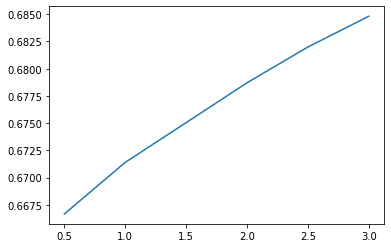

In [50]:
from sklearn.svm import SVR
C=[0.5,1,1.5,2,2.5,3]
scores=[]
for c in C:
    model= SVR(kernel='linear',C=c)
    model.fit(X_train,y_train)
    pred=model.predict(X_valid)
    scores.append(model.score(X_valid,y_valid))
plt.plot(C, scores)
plt.xticks(C);

# Polynomial Kernel SVM (construct a loop that finds the best polynomial degree d, the best C, the best coef0, and the best Gamma Hyper-parameters)

In [51]:
# degree=[2,3,4,5,6]
# gamma=[0.001,.01,0.1]
# coef0=[0,0.2,0.4,0.6]
# scores_2=[]
# for c in C:
#     for d in degree:
#         for g in gamma:
#             for co in coef0:
#                 model= SVR(kernel='poly',C=c,degree=d,gamma=g,coef0=co)
#                 model.fit(X_train,y_train)
#                 pred=model.predict(X_valid)
#                 scores_2.append(model.score(X_valid,y_valid))

In [52]:
# I tried to do number 2 in assignment but it took much time and it didnt run,I do not know if the problem in my laptop or in the code

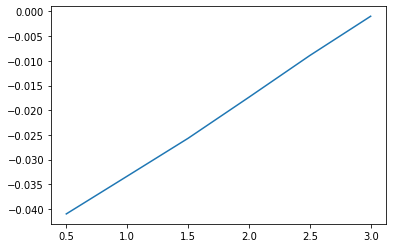

In [53]:
C=[0.5,1,1.5,2,2.5,3]
scores_1=[]
for c in C:
    model= SVR(kernel='poly',C=c)
    model.fit(X_train,y_train)
    pred=model.predict(X_valid)
    scores_1.append(model.score(X_valid,y_valid))
plt.plot(C, scores_1)
plt.xticks(C);

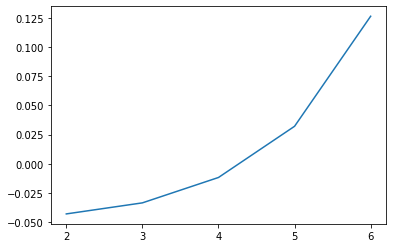

In [54]:
degree=[2,3,4,5,6]
scores_2=[]
for d in degree:
    model= SVR(kernel='poly',degree=d)
    model.fit(X_train,y_train)
    pred=model.predict(X_valid)
    scores_2.append(model.score(X_valid,y_valid))
plt.plot(degree, scores_2)
plt.xticks(degree);

In [55]:
# gamma=[0.001,.01,0.1]
# scores_3=[]
# for g in gamma:
#     model= SVR(kernel='poly',gamma=g)
#     model.fit(X_train,y_train)
#     pred=model.predict(X_valid)
#     scores_3.append(model.score(X_valid,y_valid))
# plt.plot(gamma, scores_3)
# plt.xticks(gamma);

In [56]:
scores_3=[]
for c in C:
    model= SVR(kernel='rbf',C=c)
    model.fit(X_train,y_train)
    pred=model.predict(X_valid)
    scores_3.append(model.score(X_valid,y_valid))

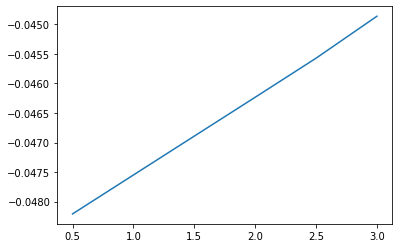

In [58]:
plt.plot(C, scores_3)
plt.xticks(C);

In [61]:
Epsilon=[0.01,0.03,0.05,0.07,0.09]
scores_4=[]
for e in Epsilon:
    model= SVR(epsilon=e)
    model.fit(X_train,y_train)
    pred=model.predict(X_valid)
    scores_4.append(model.score(X_valid,y_valid))

In [62]:
scores_4

[-0.04754891958313223,
 -0.04754891958313223,
 -0.04754891958313223,
 -0.04754891958313223,
 -0.04754891958313223]

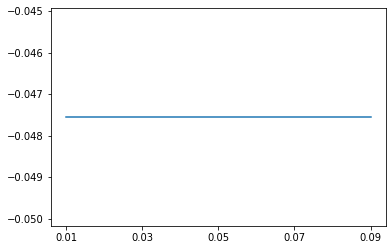

In [64]:
plt.plot(Epsilon, scores_4)
plt.xticks(Epsilon);

---------------

$$ Submitted \space by: \space Ahmed \space Azzam $$